In [1]:
from classes.simulator import ALMONDOSimulator
from classes.almondoModel import AlmondoModel
import networkx as nx
import ndlib.models.ModelConfig as mc
import json
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

## Funzioni

In [2]:
def create_strategies(n_lobbyists: int, lobbyists_data: dict, N: int, nruns: int, strategies_path:str):
        """
        Generate and save strategies for the lobbyists.
        """
        print('Creating strategies')

        for id in range(n_lobbyists):
            data = lobbyists_data[id]
            B = data['B']
            c = data['c']
            folder = os.path.join(strategies_path, str(B))
            os.makedirs(folder, exist_ok=True)
            for run in range(nruns):
                filename = f'strategy_{run}.txt'
                path = os.path.join(folder, filename)
                if not os.path.exists(path):
                    inter_per_time = B // (c * 3000)
                    matrix = np.zeros((3000, N), dtype=int)
                    for t in range(3000):
                        indices = np.random.choice(N, inter_per_time, replace=False)
                        matrix[t, indices] = 1
                    print('Saving strategy to file')
                    np.savetxt(path, matrix, fmt="%i")
                else:
                    continue
        print('Strategies created')

In [3]:
def read_random_strategy(strategies_path, B: int) -> tuple:
        """
        Read a random strategy for a given B value.

        Arguments:
        - B: The B value associated with the lobbyist's strategy.

        Returns:
        - tuple: A tuple containing the strategy matrix and its filename.
        """
        path = os.path.join(strategies_path, str(B))
        strategy_name = random.choice(os.listdir(path))
        filepath = os.path.join(path, strategy_name)
        return np.loadtxt(filepath).astype(int), filepath

## Parametri

In [4]:
NLs = [0, 1, 2, 3, 4, 20] #number of lobbyists in the simulations
params = {
    'N': 500,
    'p_o': 0.01,
    'p_p': 0.99,
    'initial_distribution': 'uniform',
    'T': 10000,
    'lambda_values': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'phi_values': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'base': 'results_tests'
}    

In [5]:
nl = 2

params['scenario'] = f'balanced_budgets/{nl}_lobbyists'
params['n_lobbyists'] = nl

if nl > 0:
    params['lobbyists_data'] = dict()
    for id in range(nl):
        params['lobbyists_data'][id] = {'m': id%2, 'B': 300000, 'c': 1, 'strategies': [], 'T': 3000}    

os.makedirs(params['base'], exist_ok=True)
path = os.path.join(params['base'], params['scenario'])
os.makedirs(path, exist_ok=True)

with open(os.path.join(path, 'initial_config.json'), 'w') as f:
    json.dump(params, f, indent=4)

print(f'performing simulations for {params["scenario"]}')

performing simulations for balanced_budgets/2_lobbyists


## Simulator initialization

In [6]:
base_path = params['base']
scenario_path = os.path.join(params['base'], params['scenario'])
os.makedirs(base_path, exist_ok=True)
os.makedirs(scenario_path, exist_ok=True)
strategies_path = os.path.join(scenario_path, "strategies")
os.makedirs(strategies_path, exist_ok=True)        

N = params['N']
graph = nx.complete_graph(N)  # Create a complete graph of N nodes
p_o = params['p_o']
p_p = params['p_p']
lambdas = params['lambda_values']
phis = params['phi_values']
T = params['T']
initial_distribution = params['initial_distribution']
nruns = 1
lobbyists_data = params['lobbyists_data']
n_lobbyists = params['n_lobbyists']

if n_lobbyists > 0:
    create_strategies(n_lobbyists, lobbyists_data, N, nruns, strategies_path)  # Generate strategies for lobbyists if any exist

Creating strategies
Strategies created


## Create configuration in simulator

In [7]:
parameters_pairs = ([(l, p) for l in lambdas for p in phis])
print(parameters_pairs)

[(0.0, 0.0), (0.0, 0.1), (0.0, 0.2), (0.0, 0.3), (0.0, 0.4), (0.0, 0.5), (0.0, 0.6), (0.0, 0.7), (0.0, 0.8), (0.0, 0.9), (0.0, 1.0), (0.1, 0.0), (0.1, 0.1), (0.1, 0.2), (0.1, 0.3), (0.1, 0.4), (0.1, 0.5), (0.1, 0.6), (0.1, 0.7), (0.1, 0.8), (0.1, 0.9), (0.1, 1.0), (0.2, 0.0), (0.2, 0.1), (0.2, 0.2), (0.2, 0.3), (0.2, 0.4), (0.2, 0.5), (0.2, 0.6), (0.2, 0.7), (0.2, 0.8), (0.2, 0.9), (0.2, 1.0), (0.3, 0.0), (0.3, 0.1), (0.3, 0.2), (0.3, 0.3), (0.3, 0.4), (0.3, 0.5), (0.3, 0.6), (0.3, 0.7), (0.3, 0.8), (0.3, 0.9), (0.3, 1.0), (0.4, 0.0), (0.4, 0.1), (0.4, 0.2), (0.4, 0.3), (0.4, 0.4), (0.4, 0.5), (0.4, 0.6), (0.4, 0.7), (0.4, 0.8), (0.4, 0.9), (0.4, 1.0), (0.5, 0.0), (0.5, 0.1), (0.5, 0.2), (0.5, 0.3), (0.5, 0.4), (0.5, 0.5), (0.5, 0.6), (0.5, 0.7), (0.5, 0.8), (0.5, 0.9), (0.5, 1.0), (0.6, 0.0), (0.6, 0.1), (0.6, 0.2), (0.6, 0.3), (0.6, 0.4), (0.6, 0.5), (0.6, 0.6), (0.6, 0.7), (0.6, 0.8), (0.6, 0.9), (0.6, 1.0), (0.7, 0.0), (0.7, 0.1), (0.7, 0.2), (0.7, 0.3), (0.7, 0.4), (0.7, 0.5), (0.

In [8]:
lambda_v = parameters_pairs[0][0]
phi_v = parameters_pairs[0][1]

print('Creating configuration object')
config = mc.Configuration()

print('Assigning p_o and p_p parameters')
config.add_model_parameter("p_o", p_o)
config.add_model_parameter("p_p", p_p)
print(f'p_o={p_o}, p_p={p_p}')

# Configure lambda values for each agent
if isinstance(lambda_v, list):
    for i in graph.nodes():
        config.add_node_configuration("lambda", i, lambda_v[i])
elif isinstance(lambda_v, float):
    print('Assigning homogeneous lambda')
    for i in graph.nodes():
        config.add_node_configuration("lambda", i, lambda_v)
else:
    raise ValueError("lambda_v must be a float or a list")

# Configure phi values for each agent
if isinstance(phi_v, list):
    for i in graph.nodes():
        config.add_node_configuration("phi", i, phi_v[i])
elif isinstance(phi_v, float):
    print('Assigning homogeneous phi')
    for i in graph.nodes():
        config.add_node_configuration("phi", i, phi_v)
else:
    raise ValueError("phi_v must be a float or a list")

# Initialize the model with the graph and configuration
print('Configuring model: assigning graph, parameters, and initial distribution of weights')
model = AlmondoModel(graph)

Creating configuration object
Assigning p_o and p_p parameters
p_o=0.01, p_p=0.99
Assigning homogeneous lambda
Assigning homogeneous phi
Configuring model: assigning graph, parameters, and initial distribution of weights


In [9]:
model.set_initial_status(config, kind=initial_distribution)
print('Initial status set')

Initial status set


In [10]:
print(model.status)

[0.95246821 0.58131125 0.81554443 0.17642859 0.28180933 0.35492418
 0.95542305 0.85638213 0.25572574 0.12210512 0.64637814 0.49403801
 0.15461332 0.30467479 0.8144284  0.14979003 0.31961432 0.17845697
 0.15590171 0.01493474 0.6249178  0.77567844 0.07781613 0.3860562
 0.30323066 0.9207601  0.7321407  0.21225739 0.31600788 0.84761304
 0.84278509 0.13656053 0.73853613 0.97016502 0.29779391 0.40029019
 0.41009502 0.20939852 0.56065245 0.60382907 0.48310848 0.52087432
 0.66785514 0.12179346 0.00799189 0.39643884 0.85791679 0.79900217
 0.3684007  0.77364427 0.55479798 0.10044498 0.55717327 0.29229348
 0.61798073 0.863617   0.97962371 0.80361062 0.98331385 0.04309548
 0.37499667 0.30344813 0.61686369 0.17128039 0.04936023 0.01397287
 0.00939023 0.90057268 0.227214   0.16029678 0.10662748 0.88776882
 0.29734889 0.71808941 0.21444229 0.16990952 0.92124853 0.12758969
 0.24592264 0.79554598 0.87354045 0.26156268 0.50584426 0.64141008
 0.51928215 0.03332886 0.3335511  0.7986923  0.36627471 0.36661

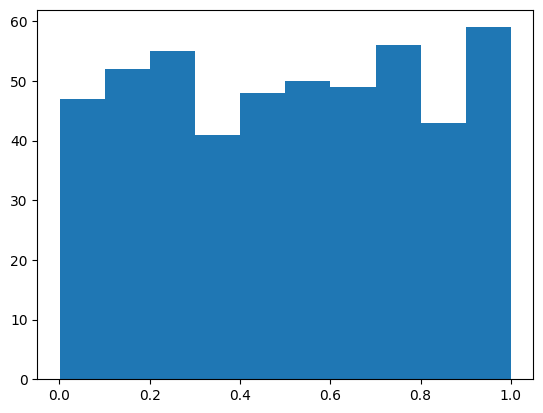

In [12]:
distrib = np.random.uniform(low=0, high=1, size=N)
plt.hist(distrib, bins=10)
plt.show()

#### La funzione iniziale su 100 run genera distribuzioni con media 0.5?

In [15]:
avg_ops = []

for _ in range(100):
    distrib = np.random.uniform(0, 1, N)
    avg_opinion = np.mean(distrib)
    print(avg_opinion)
    avg_ops.append(avg_opinion)

sum(avg_ops)/len(avg_ops)

0.5068413849395671
0.5111868322438436
0.5001301574521103
0.49992050703599145
0.5058161829718403
0.5082888440379506
0.5045929504180552
0.49402769827503723
0.5191259036124994
0.49749816319317414
0.48450989896771723
0.498990089810292
0.5199223325688703
0.5061890839096106
0.49229155299320315
0.49346875709152127
0.48906057893918536
0.5034793854458008
0.49631415343717117
0.5034964395701653
0.4910664202617174
0.5163439674557206
0.482642988028221
0.5046257431012515
0.5223714970987676
0.483181938122998
0.4997063417357518
0.5087403063460489
0.4904602786721748
0.47923799532830197
0.5018009641326783
0.5083581862891449
0.48903201574143806
0.5022722162981295
0.4674763800928116
0.5118185860563053
0.49846547874963637
0.5036302230633984
0.49748440421511153
0.5032645742470598
0.519397112378243
0.5187643384144394
0.5031608260615315
0.5074072592667183
0.49626196492159785
0.50683202251904
0.5097071466445494
0.5204673872386104
0.5099435568928892
0.4820574241259701
0.4851669767669127
0.47179427735041646
0.50

np.float64(0.5007185321767192)

In [16]:
print(model.lambdas)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [17]:
print(model.phis)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [18]:
print(model.lobbyists)

[]


In [19]:
print(model.system_status)

[]


In [20]:
print('Assign strategies to lobbyists if any')
if n_lobbyists > 0:
    for id in tqdm(lobbyists_data):
        data = lobbyists_data[id]
        B = data['B']
        print(B)
        m = data['m']
        matrix, name = read_random_strategy(strategies_path, B)
        model.add_lobbyist(m, matrix)
        lobbyists_data[id]['strategies'].append(name)

print('Configuration ended')

Assign strategies to lobbyists if any


  0%|          | 0/2 [00:00<?, ?it/s]

300000
300000


100%|██████████| 2/2 [00:00<00:00, 14.09it/s]

Configuration ended


In [21]:
print(model.lobbyists)

[<classes.almondoModel.AlmondoModel.LobbyistAgent object at 0x7279cbfd1390>, <classes.almondoModel.AlmondoModel.LobbyistAgent object at 0x7279cc008fd0>]


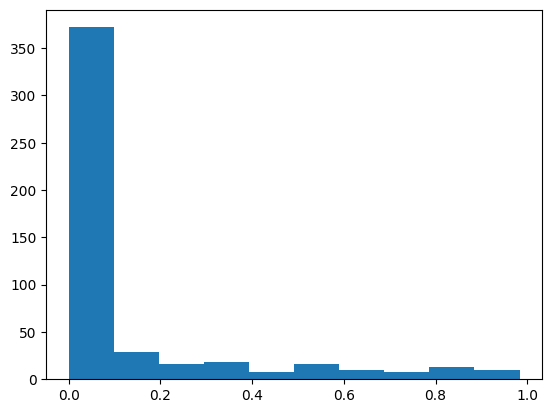

In [37]:
plt.hist(model.status)
plt.show()

In [38]:
system_status = []

In [39]:
actual_iteration = 0

In [40]:
node_status = True

In [41]:
def generate_lambda(w: np.ndarray, s: float, phi: np.ndarray, lam: np.ndarray) -> np.ndarray:
        """
        Generates a lambda value for each node based on the current status and parameters.

        Arguments:
            w (np.ndarray): The current status of nodes.
            s (float): Strategy value for influence.
            phi (np.ndarray): The phi parameter for nodes.
            lam (np.ndarray): The lambda parameter for nodes.

        Returns:
            np.ndarray: The calculated lambda values for the nodes.
        """
        f = np.abs((1 - s) - w)  # Difference between current state and strategy
        lambdas = phi * f + (1 - phi) * lam
        
        assert(len(lambdas) == len(w)), f"Length of lambdas {len(lambdas)} does not match the number of nodes {len(w)}."
        
        return lambdas  # Weighted influence

In [42]:
def update(receivers: np.ndarray, s: float) -> np.ndarray:
        """
        Updates the status of receiver nodes based on a signal and their current status.

        Arguments:
            receivers (np.ndarray): List of nodes to receive the signal.
            s (float): The signal to propagate to receivers.

        Returns:
            np.ndarray: Updated statuses for the receiver nodes.
        """
        w = model.actual_status[receivers]  # Current status of the receiver nodes
        
        p_o = model.params['model']['p_o']
        p_p = model.params['model']['p_p']
        p = w * p_o + (1 - w) * p_p  # Combined probability based on current node's status
        
        phi = model.phis[receivers]
        lam = model.lambdas[receivers]
        
        l = generate_lambda(model.actual_status[receivers], s, phi, lam)
        
        updated_w = l * w + (1 - l) * w * (s * (p_o / p) + (1 - s) * ((1 - p_o) / (1 - p)))
        
        assert(len(updated_w) == len(w)), f"Length of updated_w {len(updated_w)} does not match the number of receivers {len(w)}."
        
        return np.clip(updated_w, 0, 1)

## Interazione con il lobbista

In [43]:
def lupdate(w: np.ndarray, lobbyist: object, t: int) -> np.ndarray:
        """
        Updates the status of nodes with the influence of a given lobbyist.

        Arguments:
            w (np.ndarray): The current status of nodes.
            lobbyist (LobbyistAgent): The lobbyist influencing the nodes.
            t (int): Current time step for the lobbyist's strategy.

        Returns:
            np.ndarray: Updated node statuses considering lobbyist influence.
        """
        m = lobbyist.get_model()
        s = lobbyist.get_current_strategy(t)
        
        if s is not None:
            
            c = m * s  # Create a signal from the lobbyist at time t
            p_o = model.params['model']['p_o']
            p_p = model.params['model']['p_p']
            p = w * p_o + (1 - w) * p_p
            phi = model.phis #array of phi values for all nodes
            lam = model.lambdas #array of lambda values for all nodes
            l = generate_lambda(w, s, phi, lam)
            updated_w = (1 - s) * w + s * w * (l + (1 - l) * (c * (p_o / p) + (1 - c) * ((1 - p_o) / (1 - p))))
            assert(len(updated_w) == len(w)), f"Length of updated_w {len(updated_w)} does not match the number of nodes {len(w)}."
            
            return np.clip(updated_w, 0, 1)
        
        else:
            
            return np.clip(w, 0, 1)

In [44]:
print(model.lobbyists)

[<classes.almondoModel.AlmondoModel.LobbyistAgent object at 0x7279cbfd1390>, <classes.almondoModel.AlmondoModel.LobbyistAgent object at 0x7279cc008fd0>]


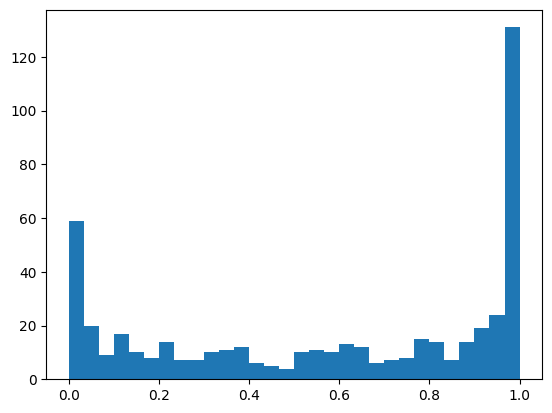

In [52]:
model.actual_status = model.status.copy()

if model.actual_iteration == 0:
    model.actual_iteration += 1
    if node_status:
        its = {"iteration": 0, "status": {i: value for i, value in enumerate(model.actual_status)}}
    else:
        its = {"iteration": 0, "status": {}}

p_o = model.params['model']['p_o']
p_p = model.params['model']['p_p']

lobbyist_list = model.lobbyists.copy()
                
random.shuffle(lobbyist_list)

if len(model.lobbyists) > 0:
    for lobbyist in lobbyist_list:
        if model.actual_iteration < lobbyist.get_max_t():
            w = lupdate(model.actual_status, lobbyist, model.actual_iteration)

model.actual_status = w.copy()

plt.hist(model.actual_status, bins=30)
plt.show()


In [53]:
system_status.append(its)

In [54]:
sender = random.randint(0, model.n - 1)
print('sender ', sender)

try:        
    p = model.actual_status[sender] * p_o + (1 - model.actual_status[sender]) * p_p
    print('p ', p)
    assert(p >= 0 and p <= 1), f"Probability should be between 0 and 1, not {p}."
    signal = np.random.binomial(1, p)
    print('signal ', signal)
    assert(signal == 0 or signal == 1), f"Signal should be 0 or 1, not {signal}."

except ValueError as e:
    print('Info about code that causes the error -->')
    print('Error = ', e)
    print('p = ', p)
    print('sender = ', sender)
    print('sender actual status = ', model.actual_status[sender])
    
receivers = np.array(list(model.graph.neighbors(sender)))
print(receivers)

sender  400
p  0.9882125301673107
signal  1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

### Update functions

## Interazione con il sender

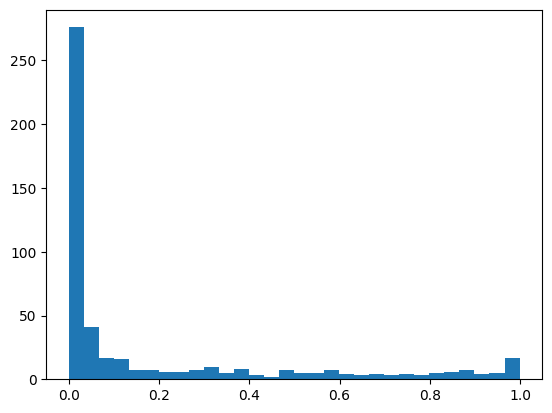

In [55]:
if len(receivers) > 0:
    model.actual_status[receivers] = update(receivers=receivers, s=signal)

assert(np.all(model.actual_status >= 0) and np.all(model.actual_status <= 1)), "Status values should be between 0 and 1."
assert(len(model.actual_status) == model.n), f"Length of actual_status {len(model.actual_status)} does not match the number of nodes {self.n}."

model.actual_iteration += 1
model.status = model.actual_status

plt.hist(model.actual_status, bins=30)
plt.show()

if node_status:
    its = {"iteration": model.actual_iteration - 1, "status": {i: value for i, value in enumerate(model.actual_status)}}
else:
    its = {"iteration": model.actual_iteration - 1, "status": {}}

In [56]:
system_status.append(its)

In [57]:
print(system_status)

[{'iteration': 1, 'status': {0: np.float64(0.16833665676535678), 1: np.float64(0.581311253603559), 2: np.float64(0.04275093418015223), 3: np.float64(0.002159204439792383), 4: np.float64(0.28180933248033097), 5: np.float64(0.005526913476008433), 6: np.float64(0.17796696864364944), 7: np.float64(0.05680979165438049), 8: np.float64(0.0034586099182041894), 9: np.float64(0.001402963773194705), 10: np.float64(0.01812871107040298), 11: np.float64(0.009766632119552957), 12: np.float64(0.0018439738405001023), 13: np.float64(0.004406516509244552), 14: np.float64(0.04244906059450442), 15: np.float64(0.0017764351295636736), 16: np.float64(0.004722587587129163), 17: np.float64(0.00218935480093017), 18: np.float64(0.0018621437613764058), 19: np.float64(0.00015311965416202808), 20: np.float64(0.016550582295521768), 21: np.float64(0.03374934222804684), 22: np.float64(0.000851622044193386), 23: np.float64(0.006311563471226339), 24: np.float64(0.3032306602917189), 25: np.float64(0.9207600995785351), 26:

In [58]:
print(len(system_status))

4
